# Axion-Photon coupling discovery limit



In [5]:
from numpy import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import AxionFuncs
import Like

gname = 'Photon'

# Number of mass points for discovery limits
# n_DL = 100
n_DL = 100
m_DL_vals = logspace(log10(1e-3),log10(2e-1),n_DL)

# Number of mass points for data table 
#nm = 10000
nm = 1000
m_vals = logspace(-4.0,2e0,nm)

# Timing
Exp = 1.5 # years
short_time = Exp*0.7
long_time = Exp-short_time

# Energy range for binned data
E_max = 20.0 # Max energy (20 keV for photon, 10 keV for electron)
nE_bins = 100 # Number of bins (needs to be >100 to get good results)
E0 = 50.0e-3
E_bins,R_long,R0_long = AxionFuncs.BinnedPhotonNumberTable(m_vals,E0,E_max,nE_bins,coupling=gname,nfine=10,res_on=False,Exposure=Exp) 
E_bins,R_short,R0_short = AxionFuncs.BinnedPhotonNumberTable(m_vals,E0,E_max,nE_bins,coupling=gname,nfine=10,res_on=False,Length=10.0,Exposure=Exp) 

#R0_short = AxionFuncs.BinnedPhotonNumberTable_Massless(E0,E_max,nE_bins,coupling=gname,nfine=10,res_on=False,Length=10,Exposure=Exp)

# Append long and short exposure
R_full = zeros(shape=(nE_bins*2,nm))
R0_full = append(R0_long*long_time/Exp,R0_short*short_time/Exp)
for i in range(0,nm):
    R_full[:,i] = append(R_long[:,i]*long_time/Exp,R_short[:,i]*short_time/Exp)

# Flux uncertainty
Phi0 = 1.0
dPhi0 = Phi0*0.1

DL_long = Like.MassDiscoveryLimit_Minuit(m_vals,R_long,R0_long,Phi0,dPhi0,m_DL_vals,ng=500)
DL_longshort1 = Like.MassDiscoveryLimit_Minuit(m_vals,R_full,R0_full,Phi0,Phi0*0.1,m_DL_vals,ng=500)
DL_longshort2 = Like.MassDiscoveryLimit_Minuit(m_vals,R_full,R0_full,Phi0,Phi0*0.2,m_DL_vals,ng=500)
DL_longshort3 = Like.MassDiscoveryLimit_Minuit(m_vals,R_full,R0_full,Phi0,Phi0*0.3,m_DL_vals,ng=500)

IAXO = Like.ConstantObsNumberLine(5.9,m_DL_vals,m_vals,R_long)

Plot data generated by first cell

The plot also shows the constraints from horizontal branch stars and CAST (which is just a scaled down version of IAXO for this plot)

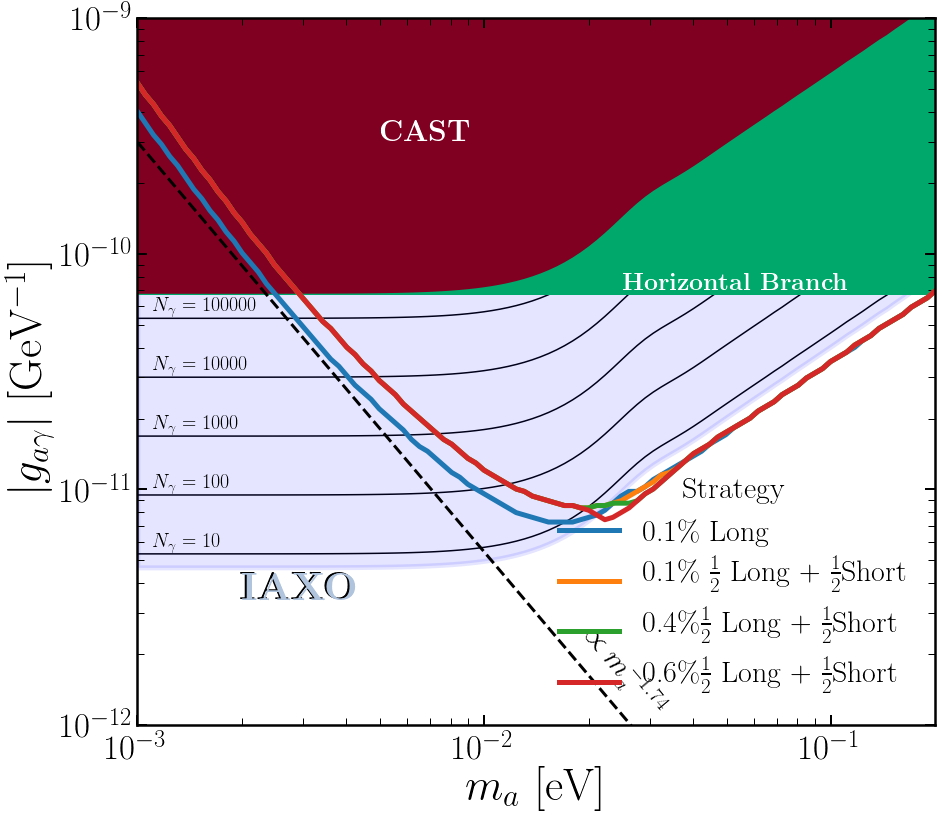

In [6]:
# Set various plotting style things
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(14.3,13))
ax = fig.add_subplot(111)

# Limits for y-axis
ymin = 1e-12
ymax = 1e-9

# Plot IAXO limit
plt.fill_between(m_DL_vals,IAXO,y2=ymax,edgecolor="Blue",facecolor="Blue",alpha=0.1,linewidth=5)
plt.text(1.98e-3,3.44e-12,r"{\bf IAXO}",fontsize=40)
plt.text(2e-3,3.4e-12,r"{\bf IAXO}",color="lightsteelblue",fontsize=40)

# Plot constant event numbers lines
for Ngamma in [10,100,1000,10000,100000]:
    Nline = Like.ConstantObsNumberLine(Ngamma,m_DL_vals,m_vals,R_long)
    plt.loglog(m_DL_vals,Nline,'k-',zorder=0)
    plt.text(1.1e-3,Nline[0]*1.05,r'$N_\gamma$ = '+str(Ngamma),fontsize=20)

# HB limit
HB_col = [0.0, 0.66, 0.42]
HBmin = 6.7e-11
plt.fill_between([1e-3,1e0],[HBmin,HBmin],y2=ymax,edgecolor=None,facecolor=HB_col)
plt.text(2.5e-2,7e-11,r'{\bf Horizontal Branch}',fontsize=25,color='w')

# CAST limit
CAST_col = [0.5, 0.0, 0.13]
CAST = IAXO*14.5
plt.fill_between(m_DL_vals,CAST,y2=ymax,edgecolor=None,facecolor=CAST_col)
plt.text(5e-3,3e-10,r'{\bf CAST}',fontsize=30,color='w')


# Plot discovery limits for different resolutions
col = flipud(cm.Blues(linspace(0,1,10)))
plt.loglog(m_DL_vals,DL_long,linewidth=5,label="0.1\% Long")
plt.loglog(m_DL_vals,DL_longshort1,linewidth=5,label=r"0.1\% $\frac{1}{2}$ Long + $\frac{1}{2}$Short")
plt.loglog(m_DL_vals,DL_longshort2,linewidth=5,label=r"0.4\%$\frac{1}{2}$ Long + $\frac{1}{2}$Short")
plt.loglog(m_DL_vals,DL_longshort3,linewidth=5,label=r"0.6\%$\frac{1}{2}$ Long + $\frac{1}{2}$Short")


    
# Plot g \propto m^(-1.74) line
plt.plot(m_DL_vals,1.8e-15*m_DL_vals**-1.74,'k--',linewidth=3)
plt.text(1.8e-2,2.1e-12,r'$\propto m_a^{-1.74}$',fontsize=30,rotation=-50)


# Load in MC data
#dat = loadtxt('../my_data/MonteCarlo/Graph_gagg_res010_threshold100_eff.txt')
#plt.loglog(dat[:,0],dat[:,1],'r-',linewidth=3)

# Plot KSVZ line
#plt.plot(m_DL_vals,2e-10*1.92*m_DL_vals,'k-',linewidth=3,zorder=0)

# Style
plt.xlim([m_DL_vals[0],m_DL_vals[-1]])
plt.ylim([ymin,ymax])
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax.tick_params(axis='x', which='major', pad=10)
plt.xlabel(r"$m_a$ [eV]",fontsize=45)
plt.ylabel(r"$|g_{a\gamma}|$ [GeV$^{-1}$]",fontsize=45)

# Legend
leg = plt.legend(fontsize=30,frameon=False,title=r'Strategy',loc="lower right")
plt.setp(leg.get_title(),fontsize=30)

# Show and save
plt.show()
fig.savefig('../plots/MassDiscoveryLimit_Photon.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/MassDiscoveryLimit_Photon.png',bbox_inches='tight') # Save for preview in README

In [ ]:
# Save data for other plots (if needed to overwrite what is already there)
savetxt("../my_data/MassDiscoveryLimit_Photon.txt",vstack((m_DL_vals,DL)))